In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Charger les données (mettre le bon path ou monter Google Drive)
df = pd.read_csv("database_with_sectors.csv")


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18242 entries, 0 to 18241
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            18242 non-null  int64 
 1   title             18242 non-null  object
 2   company           18242 non-null  object
 3   location          18242 non-null  object
 4   posted            18242 non-null  object
 5   contract_format   18242 non-null  object
 6   work_mode         18242 non-null  object
 7   qualifications    18242 non-null  object
 8   description       18242 non-null  object
 9   url               18242 non-null  object
 10  cleaned_title     18241 non-null  object
 11  job_category      18242 non-null  object
 12  final_skills      18242 non-null  object
 13  secteur_activite  18242 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.9+ MB


<ipython-input-44-ea224ce0195d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data_titles.values, y=top_data_titles.index, palette="Blues_d")


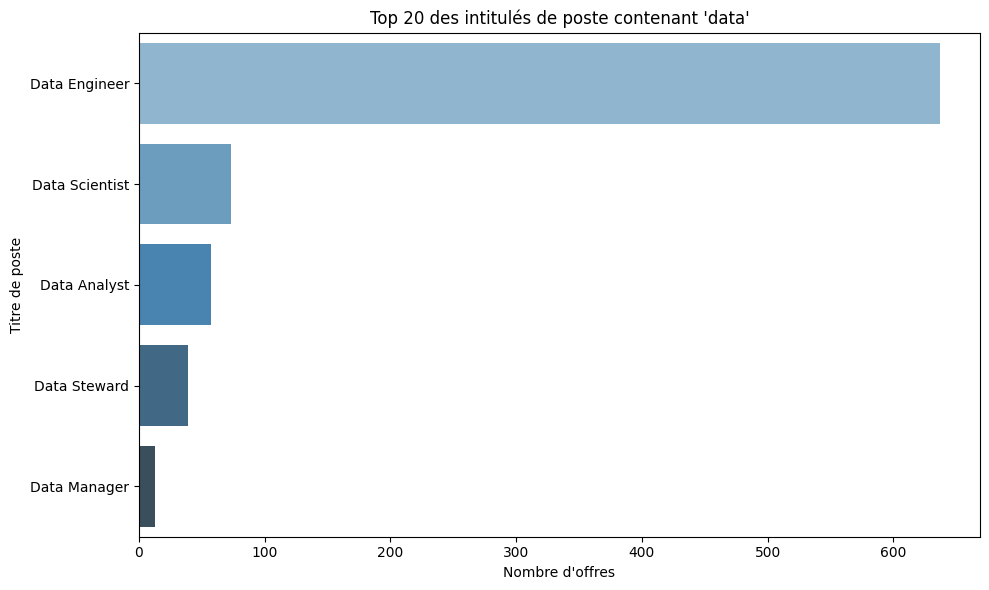

In [ ]:
# === TOP 20 MÉTIERS LIÉS À LA DONNÉE ===
df_data = df[df["job_category"].str.contains("data", case=False, na=False)]
top_data_titles = df_data["job_category"].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_data_titles.values, y=top_data_titles.index, palette="Blues_d")
plt.title("Top 20 des intitulés de poste contenant 'data'")
plt.xlabel("Nombre d'offres")
plt.ylabel("Titre de poste")
plt.tight_layout()
plt.show()

<ipython-input-45-174aacda9736>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_all_titles.values, y=top_all_titles.index, palette="Greens_d")


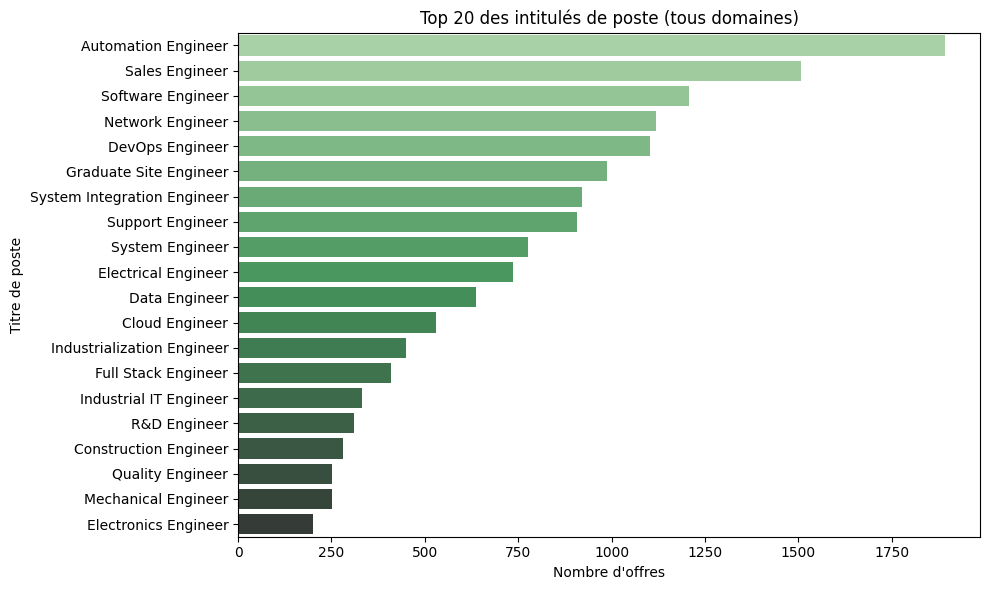

In [ ]:
# === TOP 20 MÉTIERS GLOBAUX ===
top_all_titles = df["job_category"].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_all_titles.values, y=top_all_titles.index, palette="Greens_d")
plt.title("Top 20 des intitulés de poste (tous domaines)")
plt.xlabel("Nombre d'offres")
plt.ylabel("Titre de poste")
plt.tight_layout()
plt.show()


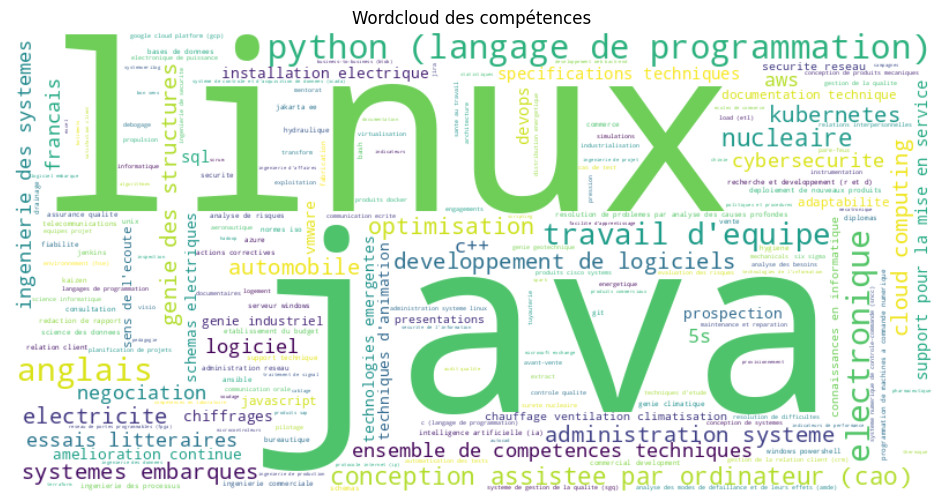

In [ ]:
# === WORDCLOUD DES COMPÉTENCES ===
from collections import Counter

all_skills = []
for row in df["final_skills"].dropna():
    for skill in str(row).split(","):
        all_skills.append(skill.strip().lower())

# Générer le nuage de mots
skill_freq = Counter(all_skills)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_freq)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud des compétences")
plt.show()